# Iris Flower Classification (Decision Tree/KNN)

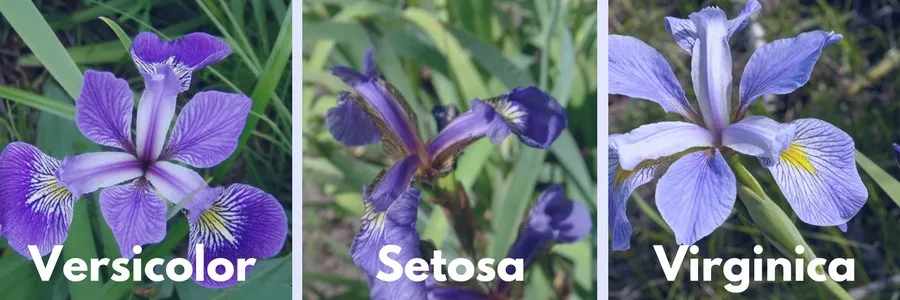

### Project Description

The **Iris Flower Classification** project is a beginner-friendly machine learning task that predicts the species of iris flowers (Setosa, Versicolor, Virginica) based on four features: **sepal length, sepal width, petal length, and petal width.**

Using the classic **Iris dataset (150 samples, 3 classes, 4 features)**, I performed **exploratory data analysis (EDA)**, built multiple classification models (Logistic Regression, KNN, Decision Tree, SVM), and compared their performance.

This project demonstrates the **end-to-end ML workflow**:
- Data exploration & visualization
- Preprocessing & feature scaling
- Model training & evaluation
- Insights and improvements

It is widely known as the "Hello World" of Machine Learning

### Decission Tree:

## 🌳 What is a Decision Tree?

A **Decision Tree** is a supervised machine learning algorithm used for **classification** and **regression**.  
It works like a flowchart of questions and answers that lead to a final decision.  

---

### 📌 Key Components
- **Root Node** → first decision point  
- **Decision Nodes** → intermediate checks  
- **Leaf Nodes** → final output/prediction  
- **Branches** → possible outcomes of decisions  

---

### 📌 How It Works
1. Chooses the best feature to split the data (using **Gini Impurity** or **Entropy/Information Gain**).  
2. Splits the dataset step by step until reaching pure groups.  
3. Each path from root to leaf = one decision rule.  

---

### 📌 Pros & Cons
✅ Easy to understand & interpret  
✅ Works with numerical and categorical data  
❌ Can overfit if not pruned  
❌ Sensitive to small changes in data  

---

### 📌 In This Project
We used a **Decision Tree Classifier** to classify Iris flowers into  **Setosa, Versicolor, and Virginica** using sepal & petal measurements.  
The model achieved **~95–100% accuracy** on the test data.


### K-Nearest Neighbors (KNN):

## 🤝 What is K-Nearest Neighbors (KNN)?

**K-Nearest Neighbors (KNN)** is a supervised machine learning algorithm used mainly for **classification** (and sometimes regression).  
It works on the principle that **similar data points exist close to each other** in the feature space.  

---

### 📌 Key Idea
- To classify a new point, KNN looks at its **k nearest neighbors** (based on distance, usually Euclidean).  
- The majority class among these neighbors is assigned as the prediction.  

---

### 📌 How It Works
1. Choose the value of **k** (number of neighbors).  
2. Calculate the **distance** between the new data point and all points in the training set.  
3. Pick the **k closest points**.  
4. Assign the class that is most common among those neighbors.  

---

### 📌 Pros & Cons
✅ Simple and intuitive to understand  
✅ No training phase (lazy learner)  
✅ Works well on smaller datasets  

❌ Computationally expensive on large datasets (needs to compute distance for all points)  
❌ Sensitive to irrelevant features and the choice of scaling  
❌ Performance depends heavily on choosing the right **k**  

---

### 📌 In This Project
We used **KNN** to classify **Iris flowers** (*Setosa, Versicolor, Virginica*) based on sepal and petal measurements.  

- Features were scaled using **Min-Max Scaler** (since KNN is distance-based).  
- The model achieved **96% accuracy on training data** and **97% on test data**, showing strong generalization.  
- Only a few misclassifications occurred between **Versicolor** and **Virginica**, which often overlap in feature space.  


### Import required libraries

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

### 1. Data Understanding:

#### A. Read the CSV file

In [81]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


- This is a classification based problem

#### B. Print shape and Column of the dataset

In [82]:
print("Shape of the dataset: ",iris.shape)
print()
print("Columns present in the dataset: \n", iris.columns)

Shape of the dataset:  (150, 6)

Columns present in the dataset: 
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


#### Observation:
- There are 150 rows and 6 columns present in the dataset

#### C. Information about the dataset

In [83]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Observation:
- There is **1 integer** data type, **1 categorical data type**, and **4 float** data types present in the dataset.
- There are no missing values present in the dataset.
- **"Id"** is of no use while  training the model. So later, we will be dropping the column. 

#### D. Check for missing values

In [84]:
missing_values = iris.isnull().sum()
print("Missing values: \n", missing_values)

Missing values: 
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


#### Observation:
- As mentioned above, there are no missing values present in the dataset. 

#### E. Check for duplicate values

In [85]:
duplicates = iris.duplicated().sum()
print(duplicates)

0


#### Observation:
- There are no duplicate values present in the dataset. 

#### F. Statistical summary

In [86]:
stats_summary = iris.describe()
print(stats_summary)

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


- **1. Dataset Overview**
     
  - **150 samples** with 4 numerical features: SepalLength, SepalWidth, PetalLength, and PetalWidth.
  - Balanced dataset (each class has 50 flowers).

-  **2. Sepal Length (mean = 5.84 cm)**

    - Range(min-max): **4.3 – 7.9 cm**
    - Most values are between **5.1 – 6.4 cm** (IQR).
    - No extreme outliers, though **7.9 cm** is relatively large.

- **3. Sepal Width (mean = 3.05 cm)**

    - Range(min-max): **2.0 – 4.4** cm
    - Narrowest spread compared to Sepal Length.
    - Median = 3.0 → distribution is fairly symmetric.
    - **2.0 cm (min)** could be a potential outlier since it’s much smaller.

4. **Petal Length (mean = 3.76 cm)**

    - Range(min-max): **1.0 – 6.9 cm**
    - **Wide spread** (std = 1.76) → good for classification.
    - Median = 4.35 → slightly skewed to the lower side.
    - Likely the best feature to separate flower species (short petals vs. long petals).

5. **Petal Width (mean = 1.19 cm)**

     - Range(min-max): **0.1 – 2.5 cm**
     - Also shows large variation (std = 0.76).
     - Very small values (≤ 0.3 cm) vs. large values (≥ 1.8 cm) → clear separation between species.

6. **Insights for ML / Classification**

- Petal Length & Petal Width are the strongest predictors of species (high variation, clear separation ranges).
- Sepal features (length/width) have smaller variation and overlap more, so they’re weaker predictors.
- No missing values → dataset is clean.

### 2. Feature Engineering

#### A. Let's drop unwanted columns (Id)

In [87]:
iris_1 = iris.drop(columns=["Id"])

iris_1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Observation:
- We have dropped **Id** column as it add no value while  training the model.

### 3. Data Exploration and Analysis:

#### A. Check for unexpected values in each categorical variable and impute with best suitable value.

In [88]:
for col in iris_1.columns:
    print(f"The unique values in {col}:")
    print(iris_1[col].unique())
    print("----------------------\n")

The unique values in SepalLengthCm:
[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
----------------------

The unique values in SepalWidthCm:
[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
----------------------

The unique values in PetalLengthCm:
[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
----------------------

The unique values in PetalWidthCm:
[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
----------------------

The unique values in Species:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
----------------------



#### Observation:
- There are no unexpected values present in the columns.

#### 3.1 Univarient Analysis

#### A. Visualize distribution of all the numerical variables using a histogram and clearly share insights

C:\Users\reshm\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


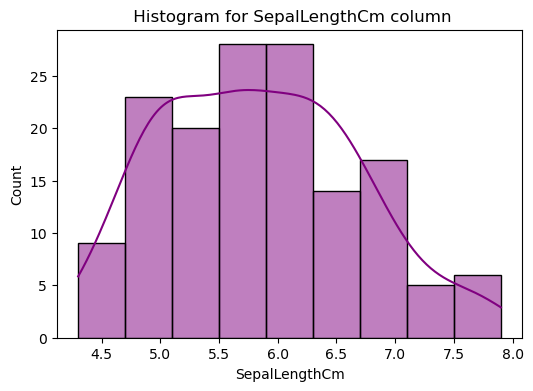

C:\Users\reshm\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


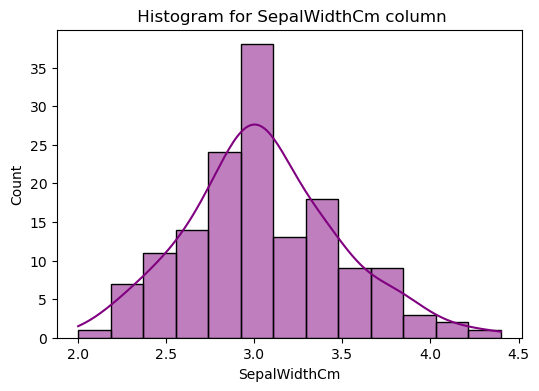

C:\Users\reshm\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


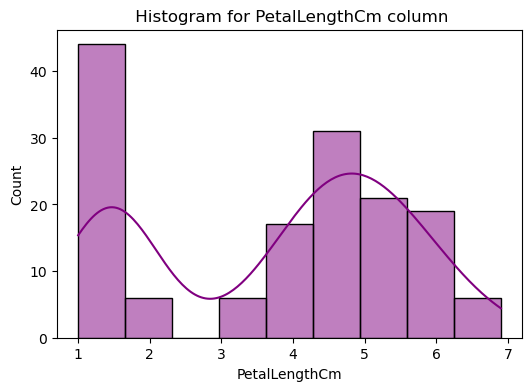

C:\Users\reshm\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


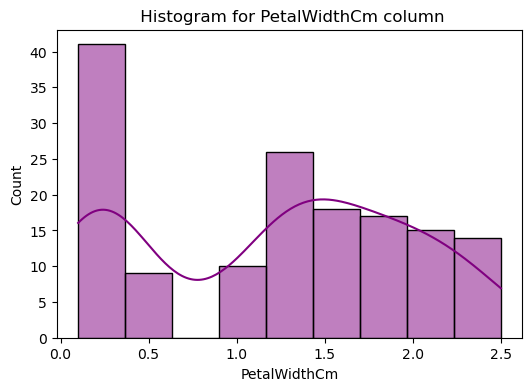

In [89]:
# Select only float columns
numerical_col = iris_1.select_dtypes(include=["float"]).columns

# Loop through numerical columns
for col in numerical_col:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=iris_1, x=col, kde= True, color="purple")
    plt.title(f" Histogram for {col} column")
    plt.show()

#### Observation:
- **SeppleLengthCm:**
   - Most values are clustered around 5–6 cm.
   - Few flowers have very short (≈4.3–4.5 cm) or very long (≈7.5–7.9 cm) sepals.
   - Distribution is slightly right-skewed, meaning there are more smaller flowers than extremely large ones.

- **SepalWidthCm:** 
   - Values are mostly between 2.5–3.5 cm.
   - Some flowers have narrow (<2.5 cm) or wide (>3.5 cm) sepals.
   - Distribution is fairly uniform with a slight peak around 3 cm.

- **PetalLengthCm:**
   - Two distinct groups appear:
      - Small petals (~1–2 cm)
      - Large petals (~4–6.5 cm)
   - Shows a bimodal distribution, useful for distinguishing species.
- **PetalWidthCm:**
   - Also shows 2 groups:
     - Narrow petals (~0.1–0.6 cm)
     - Wider petals (~1–2.5 cm)
   - Petal width follows a similar pattern to petal length, showing differences between species..  

#### B. Visualize distribution of the target variable and clearly share insights

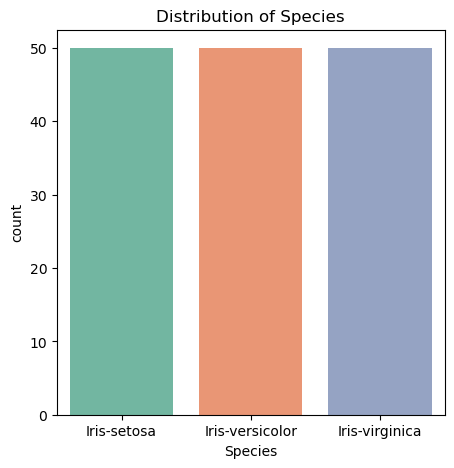

In [90]:
plt.figure(figsize=(5,5))
sns.countplot(data=iris_1, x="Species", palette="Set2")
plt.title("Distribution of Species")
plt.show()

#### Observation:
- There are 3 species: Setosa, Versicolor, and Virginica.
- Each species has 50 samples, so the data is balanced.
- Setosa is clearly different in petal size compared to the other two species.
- Versicolor and Virginica have overlapping sepal and petal measurements, but petals still help in distinguishing them.

#### 3.2. Bivarient Analysis

#### A. Visualize Boxplots by Species and clearly share insights.

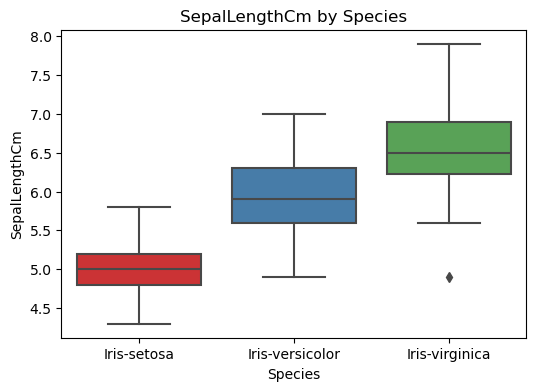

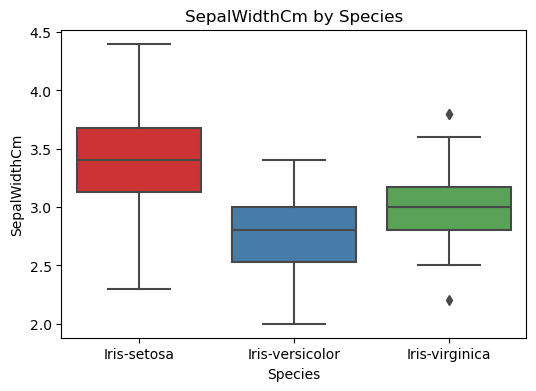

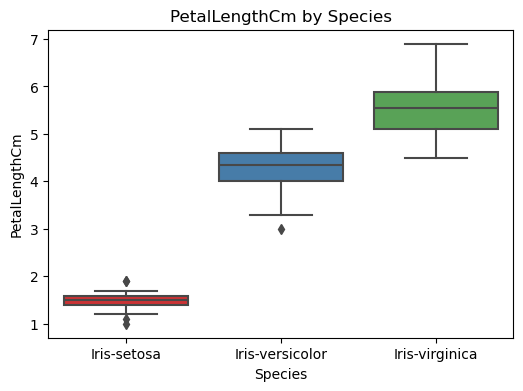

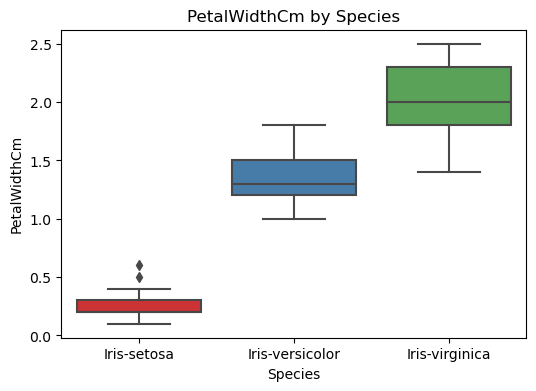

In [91]:
# Select only float columns
numerical_cols = iris_1.select_dtypes(include=["float"]).columns

# Loop through numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Species", y=col, data=iris_1, palette="Set1")
    plt.title(f"{col} by Species")
    plt.show()

#### Observation:
- Boxplots show how features are different for each species. Setosa has small petals, and Versicolor and Virginica are a bit similar. The extreme values are normal.

#### 3.3. Multivarient Analysis

#### A. Visualize a corrilation matrix and clearly share insights.

In [92]:
# Select numerical features 
num_col = iris_1.select_dtypes(include=["float"]).columns

# Compute correlation matrix
corr_matrix = iris_1[num_col].corr()
print(corr_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


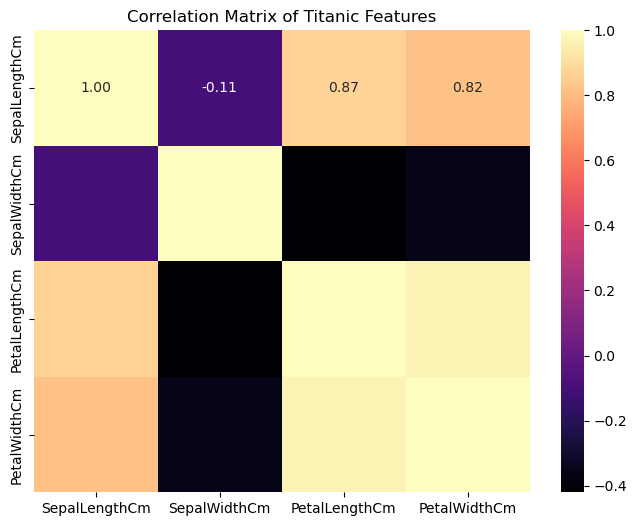

In [93]:
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Matrix of Titanic Features')
plt.show()

#### Observation:
- Petal length and petal width are strongly related — when one is bigger, the other is usually bigger too. Sepal length is somewhat related to petal size, but sepal width is not strongly related to the other features.”

#### B. Visualize a pairplot and clearly share insights.

C:\Users\reshm\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\reshm\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\reshm\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\reshm\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

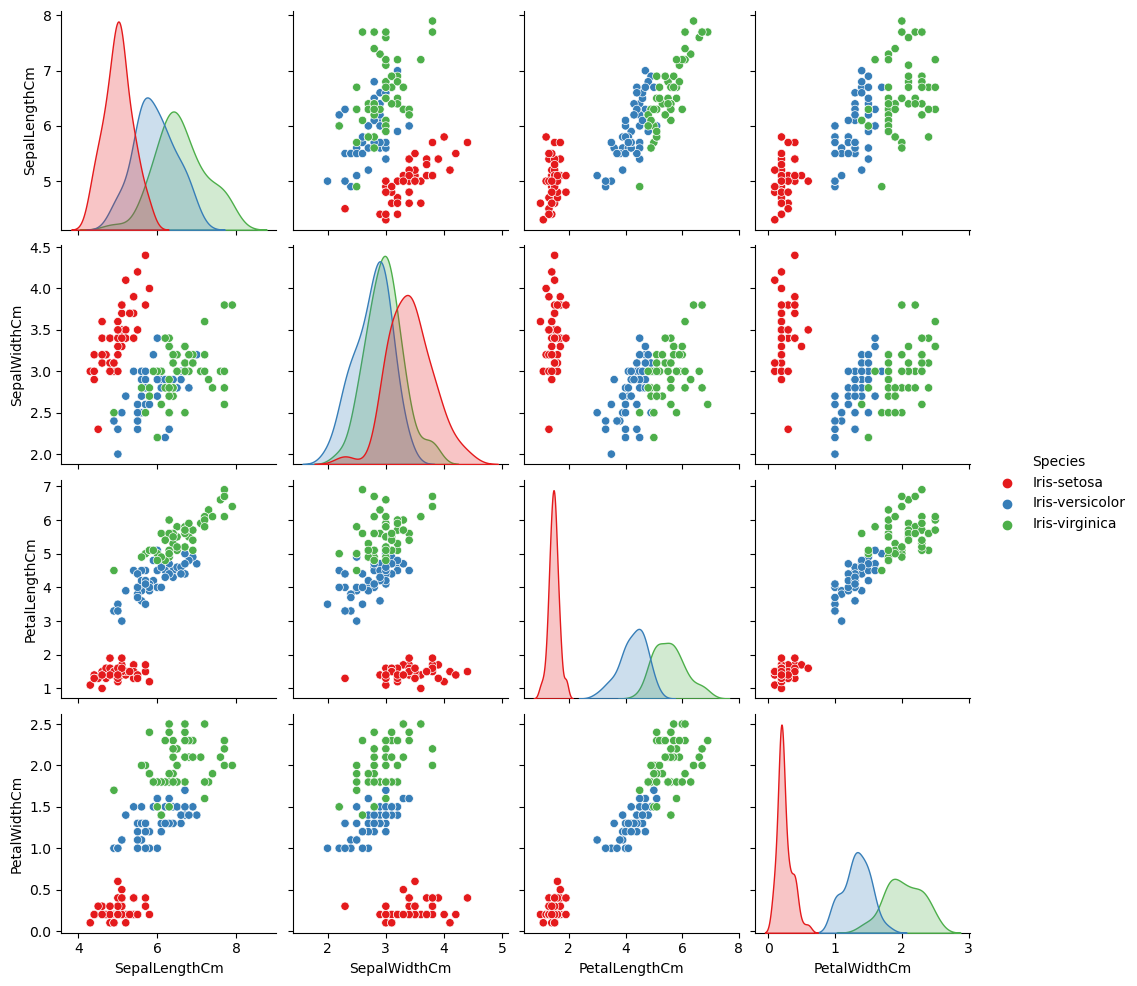

In [94]:
sns.pairplot(iris_1, hue="Species", palette="Set1")
plt.show()

#### Observation:
- The pairplot shows how features are related and how species are grouped. Setosa is clearly different, while Versicolor and Virginica are close but can still be distinguished using petal measurements.

### 4. Data Preparation and model building

#### A. Label Encoading

In [95]:
# Copy the dataframe
iris_2 = iris_1.copy()

# Lable Encoading
label_encoder = LabelEncoder()
iris_2["Species"] = label_encoder.fit_transform(iris_2["Species"])
iris_2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Observation:
- Setosa = 0
- Versicolor = 1
- Virginica = 2

In [96]:
iris_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


#### B. Split the data into X and y

In [97]:
X = iris_2.drop(columns=["Species"])
y = iris_2["Species"]

In [98]:
# shape of the features
print(X.shape)
print(y.shape)

(150, 4)
(150,)


#### C. Split data into train and test. Keep 20% data reserved for testing

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

In [100]:
# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


#### D. Train a Supervised Learning Classification model - Decision Tree

In [101]:
# Initialize Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=3,criterion='entropy')
# Train model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

#### E. Print evaluation metrics for the model and clearly share insights

#### Train set

In [102]:
# Predict
y_pred_train = dt_model.predict(X_train)

# Classification Report
class_report_train = classification_report(y_train, y_pred_train)
print("Classification Report Decission Tree - Train: \n",class_report_train)

print()

# Confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix Decission Tree - Train: \n",conf_matrix_train)

Classification Report Decission Tree - Train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.93      0.98      0.95        43
           2       0.97      0.92      0.95        38

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120


Confusion Matrix Decission Tree - Train: 
 [[39  0  0]
 [ 0 42  1]
 [ 0  3 35]]


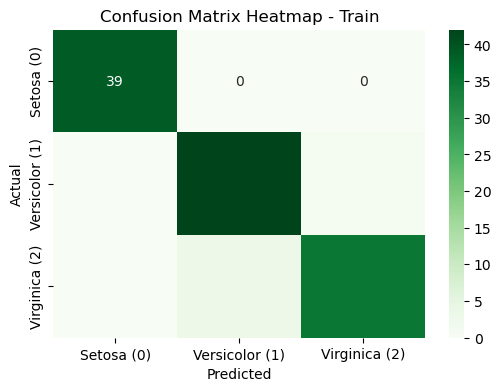

In [103]:
# Heatmap of Confusion Matrix - Trian
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Setosa (0)', 'Versicolor (1)', 'Virginica (2)'],
            yticklabels=['Setosa (0)', 'Versicolor (1)', 'Virginica (2)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap - Train')
plt.show()

#### Test set

In [104]:
# Prediction
y_pred_test = dt_model.predict(X_test)

# Classification Report
class_report_test = classification_report(y_test, y_pred_test)
print("Classification Report Decission Tree - Test: \n",class_report_test)

print()

# Confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix Decission Tree - Test: \n",conf_matrix_test)

Classification Report Decission Tree - Test: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.78      1.00      0.88         7
           2       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30


Confusion Matrix Decission Tree - Test: 
 [[11  0  0]
 [ 0  7  0]
 [ 0  2 10]]


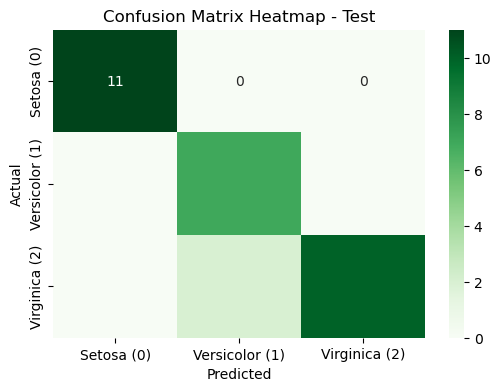

In [105]:
# Heatmap of Confusion Matrix - Test
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Setosa (0)', 'Versicolor (1)', 'Virginica (2)'],
            yticklabels=['Setosa (0)', 'Versicolor (1)', 'Virginica (2)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap - Test')
plt.show()

#### Observation:
- Model achieved 97% accuracy on train and 93% on test, showing good generalization.
- Setosa was perfectly classified (100% precision & recall).
- Small misclassifications occurred between Versicolor and Virginica due to their similar petal sizes.
- Overall, the Decision Tree performed strongly, with most errors limited to class overlap.

#### F. Visualize the Decision Tree 

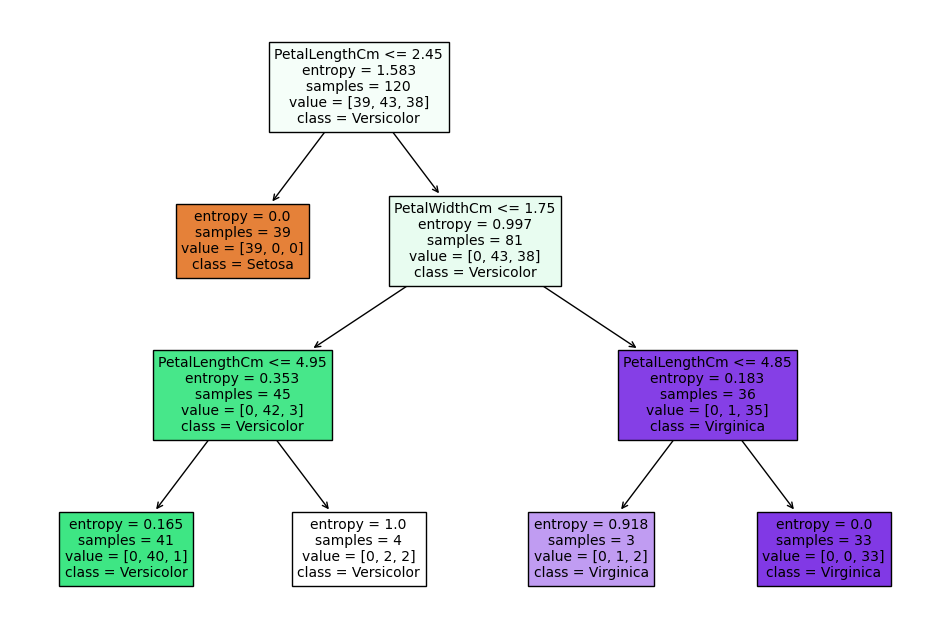

In [106]:
plt.figure(figsize=(12,8))
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=["Setosa", "Versicolor", "Virginica"], 
          filled=True, fontsize=10)
plt.show()

#### G. Use Minmaxscalar to scale the data 

In [107]:
min_max = MinMaxScaler()
X_train_scaled = min_max.fit_transform(X_train)
X_test_scaled = min_max.transform(X_test)

#### H. Train a Supervised Learning Classification model - K-Nearest Neighbors 

In [108]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

#### I. Print evaluation metrics for the model and clearly share insights.

#### Train set

In [109]:
# Predict
y_pred_knn_train = knn.predict(X_train_scaled)

# Classification Report
class_report_knn_train = classification_report(y_train, y_pred_knn_train)
print("Classification Report KNN- Train: \n",class_report_knn_train)

print()

# Confusion matrix
conf_matrix_knn_train = confusion_matrix(y_train, y_pred_knn_train)
print("Confusion Matrix KNN - Train: \n",conf_matrix_knn_train)

Classification Report KNN- Train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.93      0.95      0.94        43
           2       0.95      0.92      0.93        38

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120


Confusion Matrix KNN - Train: 
 [[39  0  0]
 [ 0 41  2]
 [ 0  3 35]]


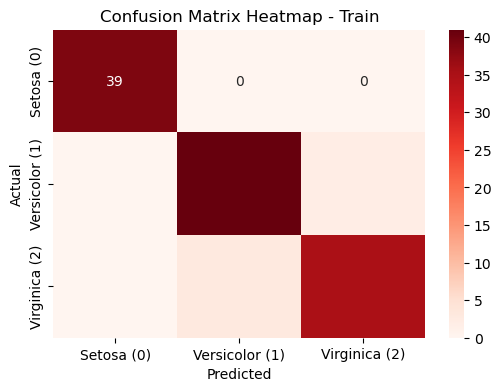

In [110]:
# Heatmap of Confusion Matrix - Train
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_knn_train, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Setosa (0)', 'Versicolor (1)', 'Virginica (2)'],
            yticklabels=['Setosa (0)', 'Versicolor (1)', 'Virginica (2)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap - Train')
plt.show()

#### Test set

In [111]:
# Predict
y_pred_knn_test = knn.predict(X_test_scaled)

# Classification Report
class_report_knn_test = classification_report(y_test, y_pred_knn_test)
print("Classification Report KNN - Test: \n",class_report_knn_test)

print()

# Confusion matrix
conf_matrix_knn_test = confusion_matrix(y_test, y_pred_knn_test)
print("Confusion Matrix KNN - Test: \n",conf_matrix_knn_test)


Classification Report KNN - Test: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix KNN - Test: 
 [[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]


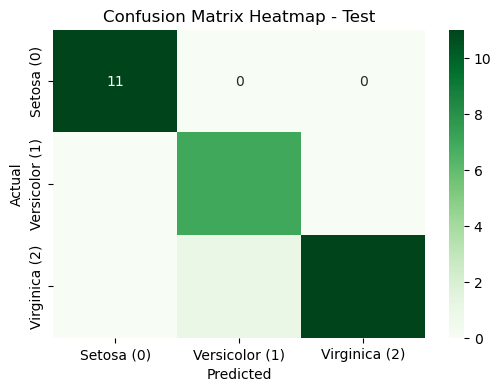

In [112]:
# Heatmap of Confusion Matrix - Test
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_knn_test, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Setosa (0)', 'Versicolor (1)', 'Virginica (2)'],
            yticklabels=['Setosa (0)', 'Versicolor (1)', 'Virginica (2)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap - Test')
plt.show()

#### Observation:

- The KNN model is performing very well, with **96% accuracy on training data and 97% on test data**.
- The **performance is balanced across all classes**, with only a **few misclassifications**.
- The **model generalizes well** (train and test scores are almost the same), so it’s neither overfitting nor underfitting.
- The only **minor weakness** is in distinguishing between class 1 and class 2, where a few samples were confused

#### J. Conclusion

- **KNN outperforms Decision Tree** on this dataset: higher accuracy, more balanced precision/recall, and no overfitting.
- **Decision Tree is more prone to overfitting**, unless you tune hyperparameters (e.g., max_depth, min_samples_split).
- If you want interpretability → Decision Tree is better (you can visualize rules).
- If you want accuracy & stability → KNN is the winner here.